# Efficient eye movements in visual word recognition: Sensitivity to the structure of the lexicon

## Analysis notebook

### Jon W. Carr, Monica Fantini, Davide Crepaldi

This Jupyter notebook runs through all the analyses described in the paper. Most of the code is contained in the `code/` directiory, which is set up as a Python module. First, we will import this module so that we have access to the main codebase throughout this notebook, and we'll also import the plots module, which contains lots of custom plotting functions.

In [1]:
%matplotlib inline
from code import *

## Preprocessing of word-frequency data

In order to perform the cross-linguistic analyses, we need word lists and word frequency data for a variety of languages. I have already collected this information for Dutch, English, German, Greek, Hebrew, Italian, Polish, Spanish, and Swahili, and the relevant word-frequency data is included in this repo under `data/lang_word_probs/`. Therefore, **the following cell does NOT need to be run** and is only included to document the preprocessing steps I performed. **You can safely skip to the next section**, unless you are interested in reproducing the word frequencies or analyzing a new language.

The raw Subtlex data is a bit messy and inconsistent and requires some preprocessing. The original Subtlex CSV files should be stored under `data/subtlex/` but I have not committed them to this public git repo because they are not mine to publish. If you want to reproduce these steps, you will first need to obtian the relevant Subtlex data files and place them in this directory.

From the raw Subtlex files we will pull out the counts of 5-9 letter words. We will only consider words that are composed of native characters (as defined for each language below). All words will be lowercased and any accents will be stripped. For example, for Dutch, the Subtlex file is encoded in UTF-8, it uses a tab separator, the relevant headers are "Word" and "FREQcount", a valid wordform is a sequence of 5-9 letters from A-Z, and no accents need to be stripped. Swahili is processed in the same way, except that the counts are pulled from a continuous text file under `data/corpora/` (although, again, the raw data file is not included in this repo).

Once the counts have been extracted, the `separate_and_reduce()` function partitions the counts by word length (i.e. into "lexicons"), reduces each lexicon to 3000 words (+ words that have the same freq as the 3000th word), and converts the freqs to probabilities. Finally, the probabilities are written to JSON files under `data/lang_word_probs/`.

In [2]:
# from code import corpus_freqs

# print('DUTCH')
# nl_freqs = corpus_freqs.count_subtlex(
#     DATA/'subtlex'/'SUBTLEX-NL.cd-above2.txt',
#     encoding = 'utf-8',
#     separator = '\t',
#     word_header = 'Word',
#     freq_header = 'FREQcount',
#     wordform = r'[a-z]{5,9}',
#     accents = {},
# )
# nl_probs = corpus_freqs.separate_and_reduce(nl_freqs, target_lexicon_size=3000)
# json_write(nl_probs, DATA/'lang_word_probs'/'nl.json', compress=True)

# print('ENGLISH')
# en_freqs = corpus_freqs.count_subtlex(
#     DATA/'subtlex'/'SUBTLEXus74286wordstextversion.txt',
#     encoding = 'ascii',
#     separator = '\t',
#     word_header = 'Word',
#     freq_header = 'FREQcount',
#     wordform = r'[a-z]{5,9}',
#     accents = {},
# )
# en_probs = corpus_freqs.separate_and_reduce(en_freqs, target_lexicon_size=3000)
# json_write(en_probs, DATA/'lang_word_probs'/'en.json', compress=True)

# print('GERMAN')
# de_freqs = corpus_freqs.count_subtlex(
#     DATA/'subtlex'/'SUBTLEX-DE_cleaned_with_Google00.txt',
#     encoding = 'latin1',
#     separator = '\t',
#     word_header = 'Word',
#     freq_header = 'WFfreqcount',
#     wordform = r'[a-zßäöü]{5,9}',
#     accents = {'ä':'a', 'ö':'o', 'ü':'u'},
# )
# de_probs = corpus_freqs.separate_and_reduce(de_freqs, target_lexicon_size=3000)
# json_write(de_probs, DATA/'lang_word_probs'/'de.json', compress=True)

# print('GREEK')
# gr_freqs = corpus_freqs.count_subtlex(
#     DATA/'subtlex'/'SUBTLEX-GR_full.txt',
#     encoding = 'utf-8',
#     separator = '\t',
#     word_header = '"Word"',
#     freq_header = '"FREQcount"',
#     wordform = r'[αβγδεζηθικλμνξοπρσςτυφχψωάέήίόύώϊϋΐΰ]{5,9}',
#     accents = {'ά':'α', 'έ':'ε', 'ή':'η', 'ί':'ι', 'ό':'ο', 'ύ':'υ', 'ώ':'ω', 'ϊ':'ι', 'ϋ':'υ', 'ΐ':'ι', 'ΰ':'υ'},
# )
# gr_probs = corpus_freqs.separate_and_reduce(gr_freqs, target_lexicon_size=3000)
# json_write(gr_probs, DATA/'lang_word_probs'/'gr.json', compress=True)

# print('Hebrew')
# he_freqs = corpus_freqs.count_subtlex(
#     DATA/'subtlex'/'dedup.he.words.unigrams.tsv',
#     encoding = 'utf-8',
#     separator = '\t',
#     word_header = 'unigram',
#     freq_header = 'unigram_freq',
#     wordform = '[\u0590-\u05fe]{5,9}',
#     accents = {},
#     rtl = True,
# )
# he_probs = corpus_freqs.separate_and_reduce(he_freqs, target_lexicon_size=3000)
# json_write(he_probs, DATA/'lang_word_probs'/'he.json', compress=True)

# print('ITALIAN')
# it_freqs = corpus_freqs.count_subtlex(
#     DATA/'subtlex'/'subtlex-it.csv',
#     encoding = 'utf-8',
#     separator = ',',
#     word_header = '"spelling"',
#     freq_header = '"FREQcount"',
#     wordform = r'[abcdefghilmnopqrstuvzàéèíìóòúù]{5,9}',
#     accents = {'à':'a', 'é':'e', 'è':'e', 'í':'i', 'ì':'i', 'ó':'o', 'ò':'o', 'ú':'u', 'ù':'u'},
# )
# it_probs = corpus_freqs.separate_and_reduce(it_freqs, target_lexicon_size=3000)
# json_write(it_probs, DATA/'lang_word_probs'/'it.json', compress=True)

# print('POLISH')
# pl_freqs = corpus_freqs.count_subtlex(
#     DATA/'subtlex'/'subtlex-pl-cd-3.csv',
#     encoding = 'utf-8',
#     separator = '\t',
#     word_header = 'spelling',
#     freq_header = 'freq',
#     wordform = r'[abcdefghijklłmnoprstuwyząćęńóśźż]{5,9}',
#     accents = {'ą':'a', 'ć':'c', 'ę':'e', 'ń':'n', 'ó':'o', 'ś':'s', 'ź':'z', 'ż':'z'},
# )
# pl_probs = corpus_freqs.separate_and_reduce(pl_freqs, target_lexicon_size=3000)
# json_write(pl_probs, DATA/'lang_word_probs'/'pl.json', compress=True)

# print('SPANSIH')
# es_freqs = corpus_freqs.count_subtlex(
#     DATA/'subtlex'/'SUBTLEX-ESP.tsv',
#     encoding = 'utf-8',
#     separator = '\t',
#     word_header = 'Word',
#     freq_header = 'Freq. count',
#     wordform = r'[abcdefghijlmnopqrstuvxyzñáéíóúü]{5,9}',
#     accents = {'ñ':'n', 'á':'a', 'é':'e', 'í':'i', 'ó':'o', 'ú':'u', 'ü':'u'},
# )
# es_probs = corpus_freqs.separate_and_reduce(es_freqs, target_lexicon_size=3000)
# json_write(es_probs, DATA/'lang_word_probs'/'es.json', compress=True)

# print('SWAHILI')
# sw_freqs = corpus_freqs.count_corpus(
#     DATA/'corpora'/'sw_helsinki.txt',
#     wordform = r'[abcdefghijklmnoprstuvwyz]{5,9}'
# )
# sw_probs = corpus_freqs.separate_and_reduce(sw_freqs, target_lexicon_size=3000)
# json_write(sw_probs, DATA/'lang_word_probs'/'sw.json', compress=True)

## Model

To play around with the model reader, we will first import the `model` module. If you want to inspect the code, see `code/model.py`.

In [3]:
from code import model

Let's test that the model reader produces some sensible output. We'll load the English-7 lexicon and use this in subsequent cells.

In [4]:
en_probs = json_read(DATA / 'lang_word_probs' / 'en.json')
lexicon = en_probs['7']

Now we instantiate a reader with the English-7 lexicon and a certain perceptual filter, and then expose it to the word "guarded" in central position (position 3 counting from 0). You can play around with the parameters to explore what happens under different languages, word lengths, fixation positions, and perceptual filters. For example, you should find that the reader usually identifies the word correctly when fixating in initial position (0) but incorrectly when fixating in final position (6).

In [5]:
reader = model.Reader(lexicon, alpha=0.9, beta=0.2, gamma=0.0)
reader.read('guarded', fixation_position=3)

   Target (t): guarded
 Fixation (j):    ^
  Percept (p): guprded
Inference (w): guarded
Selection (o): guarded


To provide some examples in the paper, I computed the top ten inferences made by the model reader when fixating the words "guarded" and "concern" in initial, central, and final position. Here is the code to do it. In the paper, I also show results with `gamma` set to `0.5` (right-visual-field advantage).

In [6]:
reader = model.Reader(lexicon, alpha=0.9, beta=0.2, gamma=0.0)

N_SIMS = 100000

for target_word in ['guarded', 'concern']:
    target_word_i = reader.get_index_from_word(target_word)

    for fixation_position in [0, 3, 6]: # initial, central, and final positions
        print(f'{target_word} in position {fixation_position+1}')
        
        p_w_given_t = reader.p_word_given_target(target_word_i, fixation_position, n_sims=N_SIMS)
        top_ten_words = reversed(p_w_given_t.argsort()[-10:])

        for inferred_word_i in top_ten_words:
            inferred_word = reader.get_word_from_index(inferred_word_i)
            percentage = round(p_w_given_t[inferred_word_i] * 100, 1)
            print(f'{percentage}%', inferred_word)

guarded in position 1
57.6% guarded
4.9% grandma
3.5% guessed
3.1% getting
2.8% glasses
1.8% gunshot
1.6% granted
1.2% grabbed
1.1% quarter
0.9% goodbye
guarded in position 4
64.8% guarded
7.2% started
3.3% quarter
2.8% married
1.8% learned
1.4% awarded
0.9% charged
0.9% boarded
0.8% charles
0.8% quarrel
guarded in position 7
23.4% guarded
14.0% started
11.7% married
11.5% decided
2.9% learned
1.8% hundred
1.8% wounded
1.6% changed
1.4% crowded
1.3% awarded
concern in position 1
53.1% concern
6.2% control
3.4% country
2.3% college
1.6% contact
1.5% concert
1.3% confess
1.2% chicken
1.2% concept
1.1% correct
concern in position 4
80.8% concern
1.6% concert
1.0% conceal
0.8% concede
0.7% chicken
0.7% dancers
0.6% concept
0.6% sincere
0.6% vincent
0.5% dancing
concern in position 7
72.7% concern
2.2% between
1.5% chicken
1.3% pattern
1.3% popcorn
1.0% goddamn
0.9% captain
0.9% western
0.8% shouldn
0.6% lincoln


### Uncertainty

The code below can be used to compute how much uncertainty the reader will experience when fixating in a given position. I ran this with 1000 sims, but since it's quite slow, we'll run it here with 10 sims.

In [7]:
N_SIMS = 10

reader = model.Reader(lexicon, alpha=0.9, beta=0.2, gamma=0.0)
uncertainty = reader.uncertainty(fixation_position=3, n_sims=N_SIMS)
print(uncertainty)

1.0716205987785867


You could run the above code for all 45 lexicons (nine languages × five lengths) and all positions within each lexicon (315 positions in total), but this will take a long time (~50 hours). I performed this process on a cluster and have included the results in this repo under `data/lang_uncertainty/`. If for some reason you want to replicate this process, perhaps for a new language, here are the steps I followed; however, this is likely to be quite different depending on your cluster (see `code/unc_compute.py` for more details). First, we create shell scripts to submit to the cluster:

```bash
$ python code/unc_compute.py --script
```

Then submit the scripts:

```bash
$ sbatch --array=0-6 -p cluster_name en_7.sh
```

Finally, merge the results together into JSON files for each language:

```bash
$ python code/unc_compute.py --merge
```

I performed this process with 1000 simulations and for two different perceptual filters:

```
data/lang_uncertainty/gamma0.0/   α=0.9, β=0.2, γ=0.0
data/lang_uncertainty/gamma0.5/   α=0.9, β=0.2, γ=0.5
```

Finally, we will plot uncertainty by letter position for each of the lexicons using both the symmetrical and asymmetrical perceptual filters. This uses the uncertainty estimates that were precomputed above and stored under `data/lang_uncertainty/`. In the case of Hebrew, I also show results under the assumption of a left-visual-field advantage (γ = -0.5).

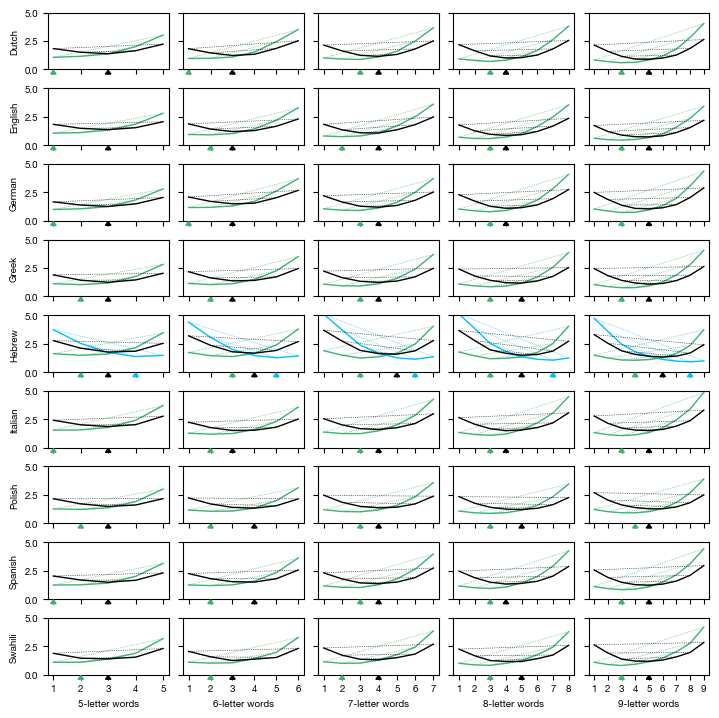

In [8]:
languages = {
    'nl': 'Dutch',
    'en': 'English',
    'de': 'German',
    'gr': 'Greek',
    'he': 'Hebrew',
    'it': 'Italian',
    'pl': 'Polish',
    'es': 'Spanish',
    'sw': 'Swahili',
}

with Figure(n_rows=9, n_cols=5, width='double', height=180) as fig:
    for i, (lang, lang_name) in enumerate(languages.items()):
        uncertainty_symm = json_read(DATA / 'lang_uncertainty' / 'gamma0.0' / f'{lang}.json')
        uncertainty_RVFA = json_read(DATA / 'lang_uncertainty' / 'gamma0.5' / f'{lang}.json')
        if lang == 'he':
            uncertainty_LVFA = json_read(DATA / 'lang_uncertainty' / 'gamma-0.5' / f'{lang}.json')
        for j, length in enumerate(range(5, 10)):
            plots.plot_uncertainty(fig[i,j], uncertainty_RVFA[str(length)], color='MediumSeaGreen', show_min=True)
            if lang == 'he':
                plots.plot_uncertainty(fig[i,j], uncertainty_LVFA[str(length)], color='DeepSkyBlue', show_min=True)
            plots.plot_uncertainty(fig[i,j], uncertainty_symm[str(length)], color='black', show_min=True)
            fig[i,j].set_xlabel(f'{length}-letter words')
            fig[i,j].set_ylabel(lang_name)
            fig[i,j].set_ylim(0, 5)

## Experiment 1

To analyze the data from Experiment 1, we will first load the data into an `Experiment` object. This is a custom object which abstracts away a lot of detail about how the data is stored. However, check `code/experiment.py` if you want to dig into the data more.

At this point, we will also set the exclusion threshold to 7 out of 8, and specify the parameter bounds and priors. (N.B. we will use beta distributions to express our certainty about the model parameters before running the experiment; these beta distributions in [0,1] will be transformed to the relevant parameter bounds under the hood).

In [9]:
exp1 = Experiment('exp1')

exp1.set_exclusion_threshold(7, 8)

exp1.set_params({
    'α': ( 0.0625, 0.9999),
    'β': ( 0.0001, 1.0000),
    'γ': (-0.9999, 0.9999),
    'ε': ( 0.0001, 0.9999),
})

exp1.set_priors({
    'α': ('beta', (8, 2)),
    'β': ('beta', (2, 8)),
    'γ': ('beta', (4, 2)),
    'ε': ('beta', (2, 16)),
})

Print the comments made by participants:

In [10]:
exp1.print_comments()

exp1_left_01: All of them started with S and they were finished with SD, so all i had to focus with was the middle part of the word.

exp1_left_02: What helped me was saying them out loud and associating them with things I know. I noticed that some of them were similar so I focused on their differences. Spatoms and svetoms were by far the easiest and on the other hand the words beginning with sga and spe were harder and it took me some time to get used to them as well as their images which were similar. Sdukoms also took me some time but after I focused on it, it was fairly easy. Also, the word made an impression on me, which helped. It was a very interesting study and it actually surprised me because I don't have the best memory.

exp1_left_03: I used the first three letters to identify the words and associate them with each object, then noticing which where similar (like SDE and SDI) to learn how to tell them apart. In the last part, I also used some of the three ending letters to ch

Print the median completion time:

In [11]:
exp1.print_median_completion_time(use_first_trial_time=True)

Median completion time of 22 minutes


Print the median bonus earned:

In [12]:
exp1.print_median_bonus()

Median bonus: 99


Print details about overall test accuracy:

In [13]:
exp1.print_test_accuracy()

exp1_left: median = 0.8392857142857143, IQR = 0.7142857142857143 -- 0.9017857142857143
exp1_right: median = 0.875, IQR = 0.8214285714285714 -- 0.9285714285714286


Produce a plot of the overall experimental results:

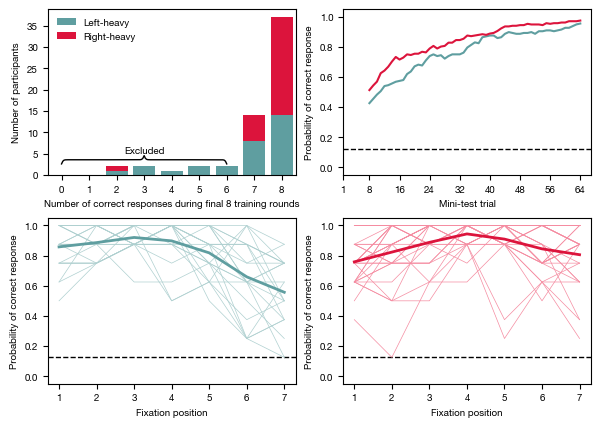

In [14]:
with Figure(n_rows=2, n_cols=2, width=150) as fig:
    plots.plot_learning_scores(fig[0,0], exp1)
    plots.plot_learning_curve(fig[0,1], exp1)
    plots.plot_test_curve(fig[1,0], exp1.left)
    plots.plot_test_curve(fig[1,1], exp1.right)
    fig.auto_deduplicate_axes = False

### Model fit

Performing the model fit requires PyMC and will take some time to run. The posteriors have already been computed and are stored as NetCDF files under `data/model_fit/`. However, if you want to reproduce the results or play around with the details, you should take a look at `code/model_fit.py`. In short, you can run an MCMC chain like this (inserting the chain number at the end):

```bash
$ python code/model_fit.py run 0
```

And then merge e.g. six MCMC chains together into a single NetCDF file like this:

```bash
$ python code/model_fit.py merge 6
```

I performed the model fit with six chains of 1000 samples (+ 200 tuning samples) with 10000 model simulations used for each sample. The posterior trace is stored in `data/model_fit/exp1_posterior.nc` and here I use ArviZ to print a table of parameter estimates:

In [15]:
import arviz

trace = exp1.get_posterior()
table = arviz.summary(trace, hdi_prob=0.95)

print(table)

    mean     sd  hdi_2.5%  hdi_97.5%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
α  0.939  0.028     0.886      0.991  ...    0.001    1038.0    1912.0    1.0
β  0.115  0.015     0.085      0.142  ...    0.000    1304.0    2018.0    1.0
γ  0.407  0.098     0.234      0.609  ...    0.001    2823.0    2927.0    1.0
ε  0.107  0.010     0.088      0.128  ...    0.000    2184.0    2980.0    1.0

[4 rows x 9 columns]


Here's a plot of the posterior parameter estimates:

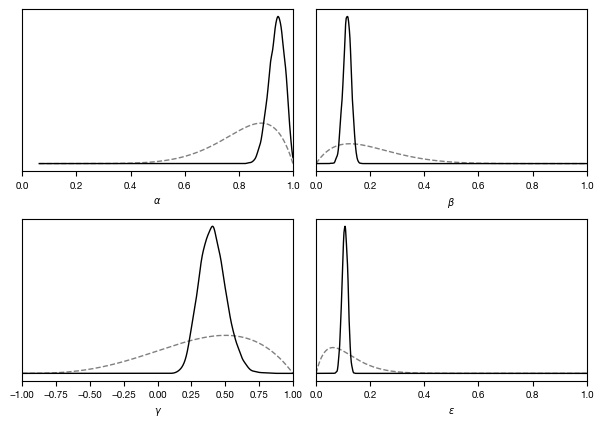

In [16]:
with Figure(n_cols=2, n_rows=2, width=150) as fig:
    for param, axis in zip(['α', 'β', 'γ', 'ε'], fig):
        plots.plot_prior(axis, exp1, param, transform_to_param_bounds=True)
        plots.plot_posterior(axis, exp1, param)
    fig.auto_deduplicate_axes = False

I also performed the model fit using uniform priors (strored in `exp1_posterior_uniform.nc`) and using the left (`exp1_posterior_left.nc`) and right (`exp1_posterior_right.nc`) datasets independently. Here's a figure comparing these three alternative methods with the canonical results:

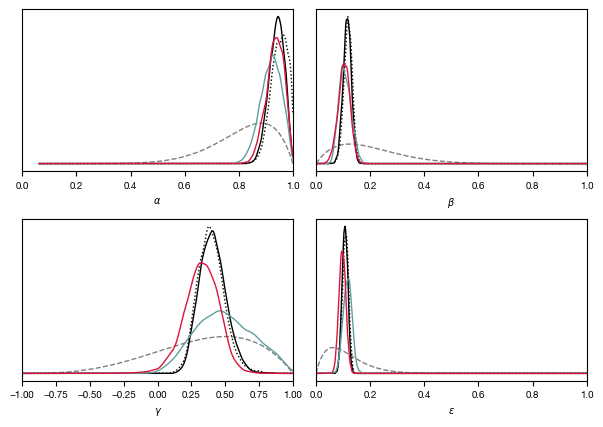

In [17]:
with Figure(n_cols=2, n_rows=2, width=150) as fig:
    for param, axis in zip(['α', 'β', 'γ', 'ε'], fig):
        plots.plot_prior(axis, exp1, param, transform_to_param_bounds=True)
        plots.plot_posterior(axis, exp1, param)
        plots.plot_posterior(axis, exp1, param,
            posterior_file=MODEL_FIT / 'exp1_posterior_uniform.nc', linestyle=':')
        plots.plot_posterior(axis, exp1.left, param,
            posterior_file=MODEL_FIT / 'exp1_posterior_left.nc')
        plots.plot_posterior(axis, exp1.right, param,
            posterior_file=MODEL_FIT / 'exp1_posterior_right.nc')
    fig.auto_deduplicate_axes = False

Using a uniform prior (dotted curve) barely changes anything, so our choice of priors is not unduely biasing the posteriors. The posteriors estimated based on the left- and right-heavy datasets independently should theoretically be the same, since participants' perceptual filters should be the same regardless of which lexicon they were exposed to. In general the two posteriors (red and blue curves) are closely aligned, although note that the uncertainty on gamma when estimated using the left-heavy dataset is pretty high (the posterior is barely different from the prior). This high level of uncertainty is probably because there were fewer participants in the left-heavy condition after exclusions.

We now run posterior predictive checks of Experiment 1. First, we simulate 100 experimental datasets based on the joint posterior estimated above (i.e. the canonical posterior estimated from the experimental data as a whole). Specifically, we draw a set of parameter values from the posterior and instantiate N Readers with that set of values (N = number of participants after excludes, which is inferred automatically from the Experiment object). We then subject each Reader to the test (each word is tested in each fixation position) and record all the trials in a big dataset. Each dataset contains trials of the form (0, 3, 4, 3), correspondinng to (lexicon_index, target word, position, inferred object).

Then, we plot the mean test curve for each of these simulated datasets and also the mean test curve for the actual experimental results. If the model and model parameter estimates are okay, the actual experimental results should fall within the posterior predictive distribution.

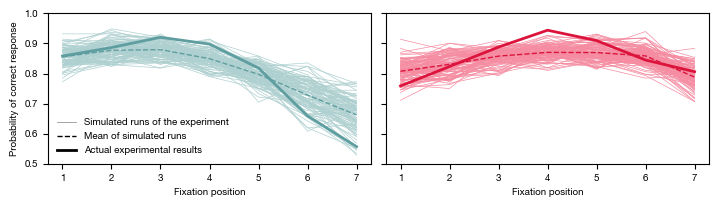

In [18]:
from code import model_fit

sim_datasets = model_fit.simulate_from_posterior(exp1, n_sims=100)

with Figure(n_cols=2, width='double', height=50) as fig:
    plots.plot_posterior_predictive(fig[0,0], sim_datasets, exp1.left, lexicon_index=0, show_legend=True)
    plots.plot_posterior_predictive(fig[0,1], sim_datasets, exp1.right, lexicon_index=1)

The real exerimental results generally fall within the posterior predictive distribution, suggesting that the experimental findings can be explained nicely by an interaction between the lexicon and right-visual-field advantage.

Lastly, we plot the uncertainty curve for each lexicon, taking into account the asymmetry in the visual span. To do this, we instantiate a Reader with the best fitting parameter values estimated from the experiment and compute uncertainty over letter positions.

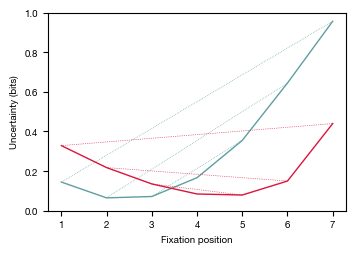

In [19]:
uncertainty_left, uncertainty_right = model_fit.uncertainty_curve_from_posterior(exp1, n_sims=10000)

with Figure() as fig:
    plots.plot_uncertainty(fig, uncertainty_left, color=exp1.left.color)
    plots.plot_uncertainty(fig, uncertainty_right, color=exp1.right.color)
    fig[0,0].set_ylim(0, 1)

This plot reveals that uncertainty is not mirrored across the two lexicons. In the left-heavy lexicon, uncertainty is strongly minimized in positions 2 and 3; in the right-heavy lexicon, uncertainty is minimized in positions 4 or 5, although it remains relatively low in most positions. This yields distinctive predictions for each condition.

## Experiment 2

If you want to explore the experimental code, see `experiments/exp2/`. First, some notes on the preprocessing of the eyetracking data. For each participant, the experiment script produces three files: `01.json`, `01.edf`, and `01.asc`. The JSON file stores all the data about trial order, button clicks etc, the EDF file stores the raw eyetracker recording, and the ASC file is a conversion of the EDF file to an open format (produced using EyeLink's `edf2asc` tool).

From the ASC file, we extract the fixation sequence and store it inside the JSON file to keep everything neatly organized together. The raw ASC and EDF files are not committed to the repo because they are very large (contact me if you want this raw data). The extraction process is run like this:

```python
from code import merge_fixation_data
merge_fixation_data.merge_fixations_into_user_data(json_path, asc_path)
```

This uses Eyekit to extract the fixations from the ASC file and then inserts them into the JSON file. It also performs a number of checks to make sure the recordings in the ASC file match the trials in the JSON file, and also creates Eyekit TextBlock objects for each trial (also stored in the JSON).

Alternatively, the extraction process can be run from the command line, e.g.:

```bash
$ python code/merge_fixation_data.py exp2_left 01
```

Note, however, that the JSON files committed to the repo have already been processed, so **it is not necessary to run any of these preprocessing steps unless you need to reproduce the data for some reason**.

Like Experiment 1, the Experiment 2 dataset will be loaded into an `Experiment` object, and before getting started we need to set up the exclusion threshold and parameters/priors.

In [20]:
exp2 = Experiment('exp2')

exp2.set_exclusion_threshold(7, 8)

exp2.set_params({
    'τ': (0, 252),
    'δ': (0, 60),
    'ζ': (0, 40),
    'ξ': (0, 40),
})

exp2.set_priors({
    'ζ': ('exponential', (0.1,)),
    'ξ': ('exponential', (0.1,)),
})

exp2.left.set_priors({
    'τ': ('normal', (72., 20.)),
    'δ': ('gamma', (20., 8.)),
})

exp2.right.set_priors({
    'τ': ('normal', (144., 20.)),
    'δ': ('gamma', (30., 8.)),
})

Print median completion time:

In [21]:
exp2.print_median_completion_time(use_first_trial_time=False)

Median completion time of 40 minutes


Print details about the number of exclusions and valid trials:

In [22]:
exp2.print_n_exclusion_stats()
exp2.left.print_n_exclusion_stats()
exp2.right.print_n_exclusion_stats()

exp2
80 participants completed training
73 participants remain after training exclusions
- 68 complete datasets (on average 60.5 trials were valid)
- 5 incomplete datasets (on average 34.0 trials were valid)
Total valid trials: 4284 (94.486)
exp2_left
40 participants completed training
37 participants remain after training exclusions
- 33 complete datasets (on average 60.6 trials were valid)
- 4 incomplete datasets (on average 29.5 trials were valid)
Total valid trials: 2119 (94.81)
exp2_right
40 participants completed training
36 participants remain after training exclusions
- 35 complete datasets (on average 60.4 trials were valid)
- 1 incomplete datasets (on average 52.0 trials were valid)
Total valid trials: 2165 (94.171)


Print details about overall test accuracy:

In [23]:
exp2.print_test_accuracy()

exp2_left: median = 0.984375, IQR = 0.9375 -- 1.0
exp2_right: median = 0.984375, IQR = 0.96875 -- 1.0


Make plots of the overall experimental results:

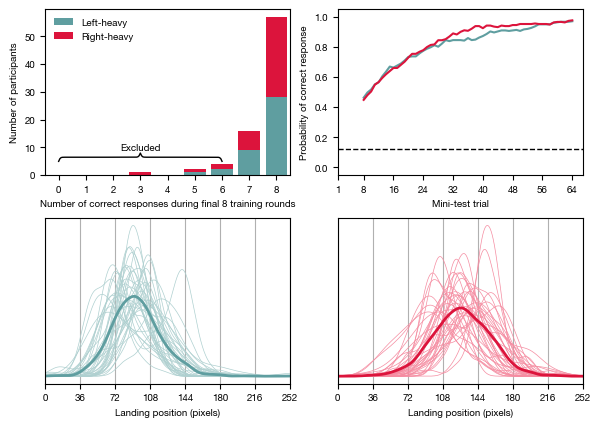

In [24]:
with Figure(n_rows=2, n_cols=2, width=150) as fig:
    plots.plot_learning_scores(fig[0,0], exp2)
    plots.plot_learning_curve(fig[0,1], exp2)
    plots.plot_landing_curve(fig[1,0], exp2.left, show_average=True)
    plots.plot_landing_curve(fig[1,1], exp2.right, show_average=True)

### Fitting statistical model

Fitting the statistical model requires PyMC and will take some time to run. The posteriors have already been computed and are stored as NetCDF files under `data/model_fit/`. However, if you want to reproduce the results or play around with the details, you should take a look at `code/landing_model.py`.

To fit the statistical model, run:

```bash
$ python code/landing_model.py
```

I ran the model with six chains of 2500 samples (+ 500 tuning samples); to adjust these parameters or check out the other available options, run this command:

```bash
$ python code/landing_model.py --help
```

The posterior trace is stored in `data/model_fit/exp2_posterior.nc` and here I use ArviZ to print a table of parameter estimates, as well as some other statistics:

In [25]:
import arviz
import numpy as np

trace = exp2.get_posterior()
table = arviz.summary(trace, hdi_prob=0.95, var_names=['τ', 'δ', 'Δ(τ)', 'Δ(δ)'])
print(table)

def proportion_of_mass_above(trace, param, x):
    samples = trace.posterior[param].to_numpy().flatten()
    return sum(samples > x) / len(samples)

def proportion_of_mass_within(trace, param, x1, x2):
    samples = trace.posterior[param].to_numpy().flatten()
    return sum(np.logical_and(samples > x1, samples < x2)) / len(samples)

print(proportion_of_mass_above(trace, 'Δ(δ)', 0), 'above 0')
print(proportion_of_mass_within(trace, 'Δ(δ)', -4, 4), 'within rope')
print(proportion_of_mass_above(trace, 'Δ(δ)', 4), 'above rope')

             mean     sd  hdi_2.5%  ...  ess_bulk  ess_tail  r_hat
τ[left]    94.007  2.461    89.212  ...   19656.0   11164.0    1.0
τ[right]  127.781  2.446   123.109  ...   18104.0   11047.0    1.0
δ[left]    21.721  0.818    20.142  ...   16667.0   12282.0    1.0
δ[right]   24.248  0.833    22.590  ...   16661.0   12038.0    1.0
Δ(τ)       33.774  3.493    27.032  ...   19123.0   11148.0    1.0
Δ(δ)        2.527  1.153     0.288  ...   18546.0   10905.0    1.0

[6 rows x 9 columns]
0.9847333333333333 above 0
0.9012666666666667 within rope
0.09873333333333334 above rope


Here's a figure plotting the priors and posteriors (top row), as well as the posterior differences between the left- and right-heavy conditions:

HDI width: 13.58
HDI width: 4.55


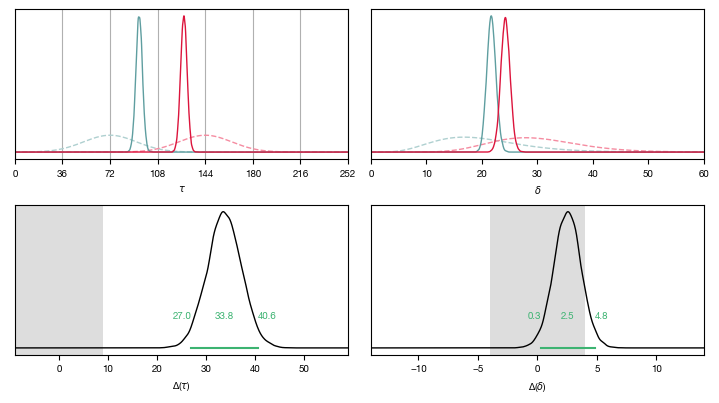

In [26]:
with Figure(n_cols=2, n_rows=2, width='double', height=100) as fig:
    plots.plot_prior(fig[0,0], exp2, 'τ')
    plots.plot_prior(fig[0,1], exp2, 'δ')
    plots.plot_posterior(fig[0,0], exp2, 'τ')
    plots.plot_posterior(fig[0,1], exp2, 'δ')
    plots.plot_posterior_difference(fig[1,0], exp2, 'τ', hdi=0.95, rope=(-9, 9), xlim=(-9, 59))
    plots.plot_posterior_difference(fig[1,1], exp2, 'δ', hdi=0.95, rope=(-4, 4), xlim=(-14, 14))
    plots.draw_letter_grid(fig[0,0], letter_width=36, n_letters=7)

The following plot shows Normal landing distributions using the partially-pooled parameter estimates, not just for each condition, but also for each participant. Participants whose data were unreliable or divergent will be shrunk towards the group level estimates.

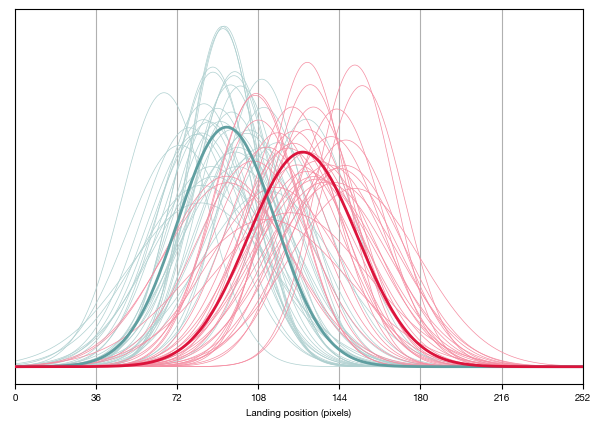

In [27]:
with Figure(width=150) as fig:
    plots.plot_landing_curve_fits(fig, exp2)

The basic statistical model above has a single ζ and a single ξ, implying that the amount of across-participant variation will be the same in each condition. However, perhaps this was not the case – perhaps, for example, participants in the left-heavy condition tend to behave in the same way while participant in the right-heavy condition use very different strategies. To check this, I ran the model with ζ and ξ stratefied by condition and the results are stored in `exp2_posterior_indy_ζξ.nc`. Here's a plot of the posteriors:

HDI width: 13.95
HDI width: 4.86
HDI width: 10.53
HDI width: 4.11


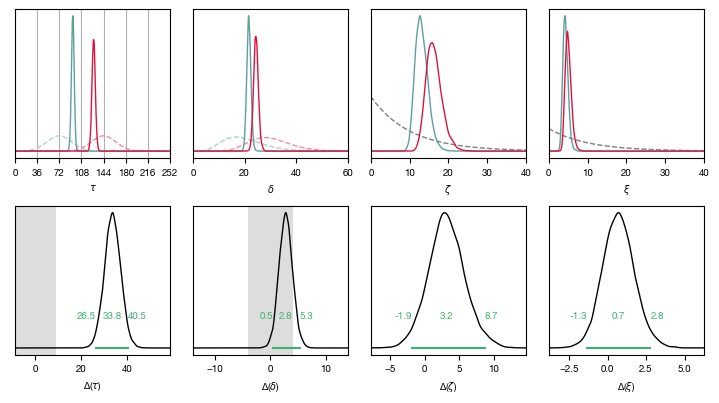

In [28]:
with Figure(n_cols=4, n_rows=2, width='double', height=100) as fig:

    plots.plot_prior(fig[0,0], exp2, 'τ')
    plots.plot_prior(fig[0,1], exp2, 'δ')
    plots.plot_posterior(fig[0,0], exp2, 'τ', posterior_file=MODEL_FIT / 'exp2_posterior_indy_ζξ.nc')
    plots.plot_posterior(fig[0,1], exp2, 'δ', posterior_file=MODEL_FIT / 'exp2_posterior_indy_ζξ.nc')
    plots.plot_posterior_difference(fig[1,0], exp2, 'τ', hdi=0.95, rope=(-9, 9), xlim=(-9, 59), posterior_file=MODEL_FIT / 'exp2_posterior_indy_ζξ.nc')
    plots.plot_posterior_difference(fig[1,1], exp2, 'δ', hdi=0.95, rope=(-4, 4), xlim=(-14, 14), posterior_file=MODEL_FIT / 'exp2_posterior_indy_ζξ.nc')
    plots.draw_letter_grid(fig[0,0], letter_width=36, n_letters=7)

    plots.plot_prior(fig[0,2], exp2, 'ζ')
    plots.plot_prior(fig[0,3], exp2, 'ξ')
    plots.plot_posterior(fig[0,2], exp2, 'ζ', posterior_file=MODEL_FIT / 'exp2_posterior_indy_ζξ.nc')
    plots.plot_posterior(fig[0,3], exp2, 'ξ', posterior_file=MODEL_FIT / 'exp2_posterior_indy_ζξ.nc')
    plots.plot_posterior_difference(fig[1,2], exp2, 'ζ', hdi=0.95, posterior_file=MODEL_FIT / 'exp2_posterior_indy_ζξ.nc')
    plots.plot_posterior_difference(fig[1,3], exp2, 'ξ', hdi=0.95, posterior_file=MODEL_FIT / 'exp2_posterior_indy_ζξ.nc')

First, note that running the model this way has little impact on the estimates for τ and δ. In the case of ξ, the two conditions are practically identical – the amount of across-participant variation in dispersion is the same for both conditions. In the case of ζ, there is some evidence to suggest that there might be more across-participant variation in targeting in the right-heavy condition, although the posterior difference between ζ's does not exclude 0. Overall then, there doesn't seem to be much benefit in running the model this way, so we stick to the canonical version of the model.

To check that the posteriors were not unduely influenced by the priors, we also ran it with uniform priors. The results are stored in `exp2_posterior_uniform.nc` and here's a plot of the results:

HDI width: 13.88
HDI width: 4.53


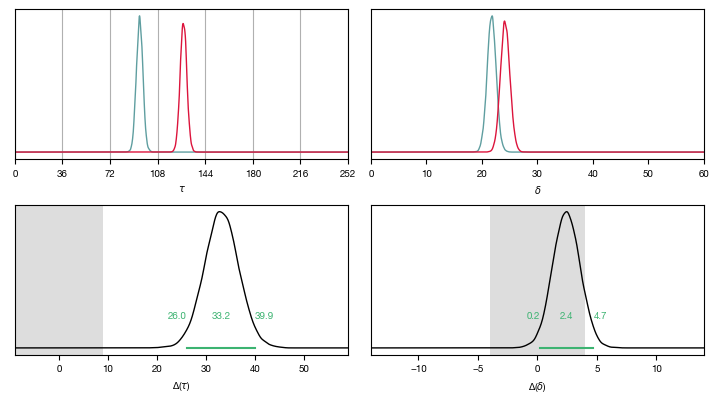

In [29]:
with Figure(n_cols=2, n_rows=2, width='double', height=100) as fig:
    plots.plot_posterior(fig[0,0], exp2, 'τ', posterior_file=MODEL_FIT / 'exp2_posterior_uniform.nc')
    plots.plot_posterior(fig[0,1], exp2, 'δ', posterior_file=MODEL_FIT / 'exp2_posterior_uniform.nc')
    plots.plot_posterior_difference(fig[1,0], exp2, 'τ', hdi=0.95, rope=(-9, 9), xlim=(-9, 59), posterior_file=MODEL_FIT / 'exp2_posterior_uniform.nc')
    plots.plot_posterior_difference(fig[1,1], exp2, 'δ', hdi=0.95, rope=(-4, 4), xlim=(-14, 14), posterior_file=MODEL_FIT / 'exp2_posterior_uniform.nc')
    plots.draw_letter_grid(fig[0,0], letter_width=36, n_letters=7)

Using uniform priors does not make any meanful difference to the results.

Finally, in post-hoc analysese, we noted a difference between trials in which the word was presented above the fixation point (requiring an upward saccade) and trials in which the word was presented below the fixation point (requiring a downward saccade). We split the dataset into two and ran the statistical model of the word-above trials and word-below trials independently. Here are the results:

HDI width: 12.64
HDI width: 5.2
HDI width: 17.5
HDI width: 5.67


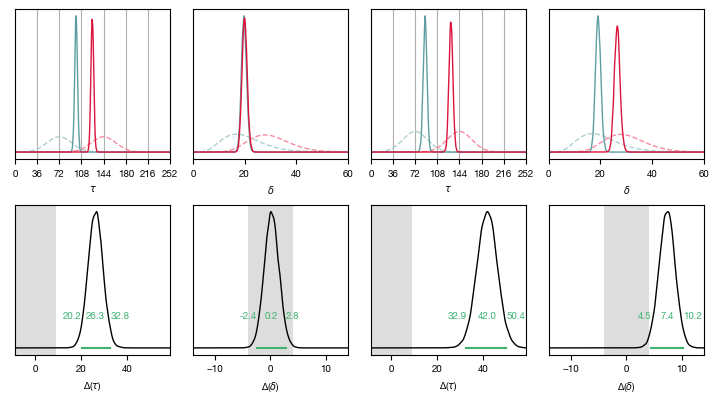

In [30]:
with Figure(n_cols=4, n_rows=2, width='double', height=100) as fig:
    # above
    plots.plot_prior(fig[0,0], exp2, 'τ')
    plots.plot_prior(fig[0,1], exp2, 'δ')
    plots.plot_posterior(fig[0,0], exp2, 'τ', posterior_file=MODEL_FIT / 'exp2_posterior_above.nc')
    plots.plot_posterior(fig[0,1], exp2, 'δ', posterior_file=MODEL_FIT / 'exp2_posterior_above.nc')
    plots.plot_posterior_difference(fig[1,0], exp2, 'τ', hdi=0.95, rope=(-9, 9), xlim=(-9, 59), posterior_file=MODEL_FIT / 'exp2_posterior_above.nc')
    plots.plot_posterior_difference(fig[1,1], exp2, 'δ', hdi=0.95, rope=(-4, 4), xlim=(-14, 14), posterior_file=MODEL_FIT / 'exp2_posterior_above.nc')
    plots.draw_letter_grid(fig[0,0], letter_width=36, n_letters=7)
    # below
    plots.plot_prior(fig[0,2], exp2, 'τ')
    plots.plot_prior(fig[0,3], exp2, 'δ')
    plots.plot_posterior(fig[0,2], exp2, 'τ', posterior_file=MODEL_FIT / 'exp2_posterior_below.nc')
    plots.plot_posterior(fig[0,3], exp2, 'δ', posterior_file=MODEL_FIT / 'exp2_posterior_below.nc')
    plots.plot_posterior_difference(fig[1,2], exp2, 'τ', hdi=0.95, rope=(-9, 9), xlim=(-9, 59), posterior_file=MODEL_FIT / 'exp2_posterior_below.nc')
    plots.plot_posterior_difference(fig[1,3], exp2, 'δ', hdi=0.95, rope=(-4, 4), xlim=(-14, 14), posterior_file=MODEL_FIT / 'exp2_posterior_below.nc')
    plots.draw_letter_grid(fig[0,2], letter_width=36, n_letters=7)

There is a difference in targeting behaviour regardless of whether you look at word-above trials (left) or word-below trials (right). However, in the case of dispersion, there's only a clear difference between conditions in the case of the word-below trials. It is unclear why this might be the case.

## Parameter recovery

As a sanity check on the Experiment 1 model fit, let's make sure known parameters can be recovered from a simulated dataset.

In [31]:
from code import model

# pick some parameter settings
TRUE_PARAMS = [0.8, 0.1, 0.4, 0.1]

# create synthetic dataset (30 participants in each condition)
dataset_l = model.simulate_dataset(exp1.left.lexicon, TRUE_PARAMS, 30, lexicon_index=0)
dataset_r = model.simulate_dataset(exp1.right.lexicon, TRUE_PARAMS, 30, lexicon_index=1)
dataset = dataset_l + dataset_r

# save the dataset
json_write(dataset, DATA / 'synthetic_datasets' / 'exp1.json')

Then we run the model fit with commands like the following. I used the same settings and priors as used to perform the model fit on the experimental data.

```bash
$ python code/model_fit.py run 0 --output_file data/synthetic_datasets/exp1_posterior.nc --dataset_override data/synthetic_datasets/exp1.json
```

Finally, plot the posteriors:

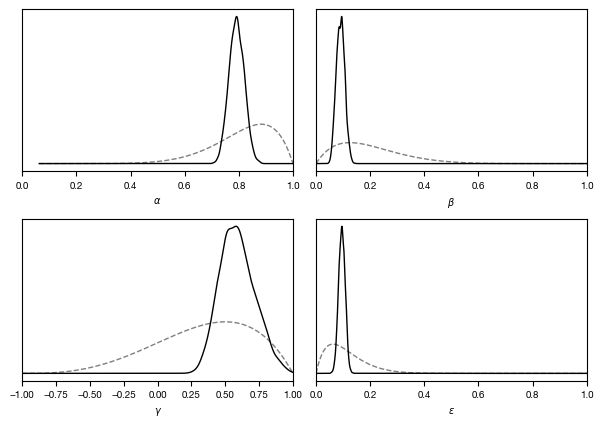

In [32]:
with Figure(n_cols=2, n_rows=2, width=150) as fig:
    for param, axis in zip(['α', 'β', 'γ', 'ε'], fig):
        plots.plot_prior(axis, exp1, param, transform_to_param_bounds=True)
        plots.plot_posterior(axis, exp1, param, posterior_file=DATA / 'synthetic_datasets' / 'exp1_posterior.nc')
    fig.auto_deduplicate_axes = False

In [33]:
import arviz

trace = exp1.get_posterior(DATA / 'synthetic_datasets' / 'exp1_posterior.nc')
table = arviz.summary(trace, hdi_prob=0.95)

print(table)

    mean     sd  hdi_2.5%  hdi_97.5%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
α  0.792  0.028     0.736      0.844  ...    0.001     739.0    1308.0   1.01
β  0.091  0.015     0.060      0.119  ...    0.000     784.0    1593.0   1.01
γ  0.589  0.129     0.343      0.838  ...    0.003    1238.0    1663.0   1.01
ε  0.095  0.012     0.073      0.119  ...    0.000    1685.0    2618.0   1.00

[4 rows x 9 columns]


The experiment was simulated with parameter values α = 0.8, β = 0.1, γ = 0.4, and ε = 0.1. In this run of the model fit, α was estimated at 0.79 (0.74–0.84), β was estimated at 0.09 (0.06–0.12), γ was estimated at 0.59 (0.34–0.84), and ε was estimated at 0.1 (0.07–0.12). Thus, α, β, and ε are pretty much spot on, while γ is a bit off and has quite of lot of uncertainty associated with it. This is similar to the model fit performed on the experimental data where the estimate for γ remained fairly uncertain.